# Polynomial regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(font_scale=.75)

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

Vi skapar ett dataset med en ickelinjär relation (notera `X**2` när vi genererar värdena i `y`.)

In [34]:
m = 100

rng = np.random.default_rng(seed=42)

X = (5 * rng.random(m,) - 2)
y = 4 + 3 * X**2 + 5 * X + rng.random(m) * 8  # Nonlinear relationship + noise

In [36]:
X.shape

(100,)

Den ickelinjära funktionen ser ut såhär:


$y = 4 + 3x^2 + 5x + \epsilon$

<Axes: >

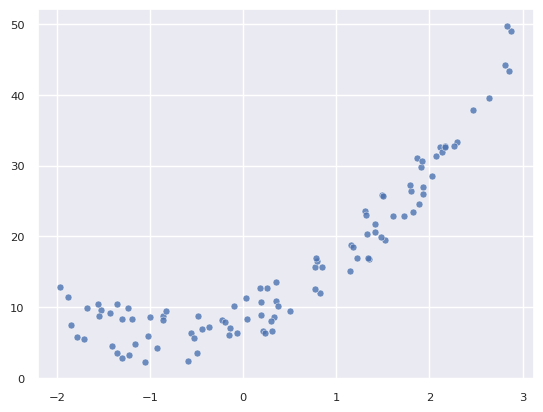

In [43]:
sns.scatterplot(x=X, y=y, alpha=.8, s=25)

### Träna modeller

#### Utan `PolynomialFeatures`

In [38]:
m1 = LinearRegression()
m1.fit(X, y)

ValueError: Expected 2D array, got 1D array instead:
array=[ 1.86978024  0.1943922   2.2929896   1.48684015 -1.52911326  2.87811176
  1.80569851  1.93032153 -1.35943184  0.25192969 -0.14600988  2.63382494
  1.2193256   2.11380807  0.21707099 -0.86380639  0.77292394 -1.68091372
  2.13815586  1.158322    1.7904387  -0.22737016  2.85349012  2.46560561
  1.89191749 -1.02680646  0.33360502 -1.78098117 -1.22855254  1.41524477
  1.72381078  2.83754866 -0.37087321 -0.14770147  0.34777906 -1.0526432
 -1.35039247  0.37852463 -0.86545325  1.34906997  0.18575959  2.16339098
  1.50132551 -0.43816679  2.16129901  2.02382179 -0.0626081  -0.55835948
  1.41247752 -1.30123758 -1.00045899 -1.96318865  1.93462189  1.32425428
  1.52582689  1.90364516  0.29457888  0.84370598 -1.30101501 -1.42734963
  1.34201481  0.35548103  0.82618053  1.82499429  1.1735916   0.767897
  0.7960358  -0.48024951 -1.84591083  0.18358695 -0.92707664  0.04264322
  2.26701537 -0.83030257 -1.70848629 -0.59308054 -0.53203121  1.30958257
  0.78516076  1.91949105  1.3215677   0.03193431  2.07010192 -1.1651354
 -1.88643963 -1.5497607   1.61179675  0.30938615 -1.1936411   0.50522388
 -1.23843949  1.48160188  0.23078138 -0.09489387 -0.49243955  1.15141297
 -0.19093695 -1.5617504  -1.40997049  2.80948832].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [46]:
X.shape, X.reshape(-1, 1)

((100,),
 array([[ 1.86978024],
        [ 0.1943922 ],
        [ 2.2929896 ],
        [ 1.48684015],
        [-1.52911326],
        [ 2.87811176],
        [ 1.80569851],
        [ 1.93032153],
        [-1.35943184],
        [ 0.25192969],
        [-0.14600988],
        [ 2.63382494],
        [ 1.2193256 ],
        [ 2.11380807],
        [ 0.21707099],
        [-0.86380639],
        [ 0.77292394],
        [-1.68091372],
        [ 2.13815586],
        [ 1.158322  ],
        [ 1.7904387 ],
        [-0.22737016],
        [ 2.85349012],
        [ 2.46560561],
        [ 1.89191749],
        [-1.02680646],
        [ 0.33360502],
        [-1.78098117],
        [-1.22855254],
        [ 1.41524477],
        [ 1.72381078],
        [ 2.83754866],
        [-0.37087321],
        [-0.14770147],
        [ 0.34777906],
        [-1.0526432 ],
        [-1.35039247],
        [ 0.37852463],
        [-0.86545325],
        [ 1.34906997],
        [ 0.18575959],
        [ 2.16339098],
        [ 1.50132551],
  

In [47]:
X_reshaped = X.reshape(-1, 1) # Modellen vill ha en (m, n)-matris
m1 = LinearRegression()
m1.fit(X_reshaped, y)

LinearRegression()

In [48]:
cross_val_score(m1, X_reshaped, y, scoring="neg_root_mean_squared_error", cv=3).mean() * -1

np.float64(5.958514425954076)

In [49]:
y.mean()

np.float64(16.29906067332888)

<Axes: >

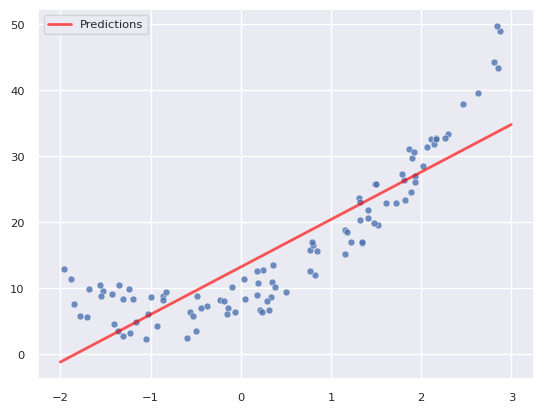

In [50]:
x = np.linspace(-2, 3, m) # Linjär data för att plotta en linje

sns.scatterplot(x=X, y=y, alpha=.8, s=25)
sns.lineplot(x=x, y=m1.predict(x.reshape(-1, 1)), c="red", alpha=.65, lw=2, label="Predictions")

In [51]:
m1.intercept_, m1.coef_

(np.float64(13.17404822521922), array([7.20726016]))

$ y = 13.2 + 7.2x $

#### Med `PolynomialFeatures`

In [52]:
m2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
m2.fit(X_reshaped, y)
cross_val_score(m2, X_reshaped, y).mean()

np.float64(0.9448266232237756)

<Axes: >

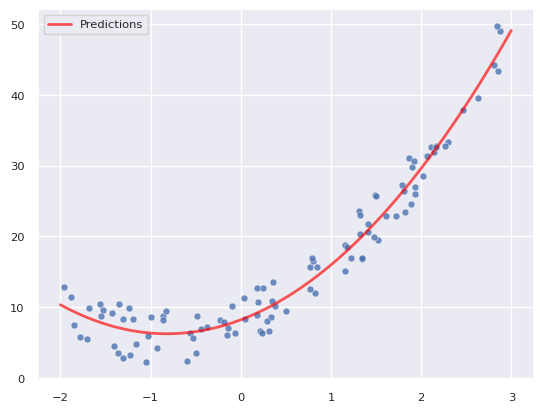

In [53]:
sns.scatterplot(x=X, y=y, alpha=.8, s=25)
sns.lineplot(x=x, y=m2.predict(x.reshape(-1, 1)), c="red", alpha=.65, lw=2, label="Predictions") # type: ignore

`m2` är en pipeline. För att komma åt *estimatorn* använder vi `named_steps`.

In [54]:
m2.named_steps["linearregression"].intercept_, m2.named_steps["linearregression"].coef_

(np.float64(8.210257756977153), array([0.        , 4.81523264, 2.9402351 ]))

Riktiga: $y =  4 + 3x^2 + 5x + \epsilon$

m2: $y = 8.2 + 2.9x^2 + 4.8x $

In [56]:
from sklearn.datasets import make_regression

X, y = make_regression(100, 2, noise=0.8)

In [64]:
df = pd.DataFrame(X, columns=["x1", "x2"])
df["y"] = y

In [65]:
df.insert(2, "x3", df["x2"]**2)

In [66]:
df

,x1,x2,x3,y
0,0.257958,-0.562436,0.316334,-18.350042
1,-1.289312,0.555334,0.308396,-65.045946
2,-0.013954,-1.506244,2.268770,-106.486430
3,-0.938758,-0.651467,0.424409,-120.705867
4,-0.407123,0.936162,0.876399,31.970287
...,...,...,...,...
95,-1.072385,0.222339,0.049435,-71.164873
96,2.194675,-0.191716,0.036755,163.727157
97,-0.178752,0.906310,0.821399,49.839927
98,-1.219051,-1.918363,3.680118,-233.558962


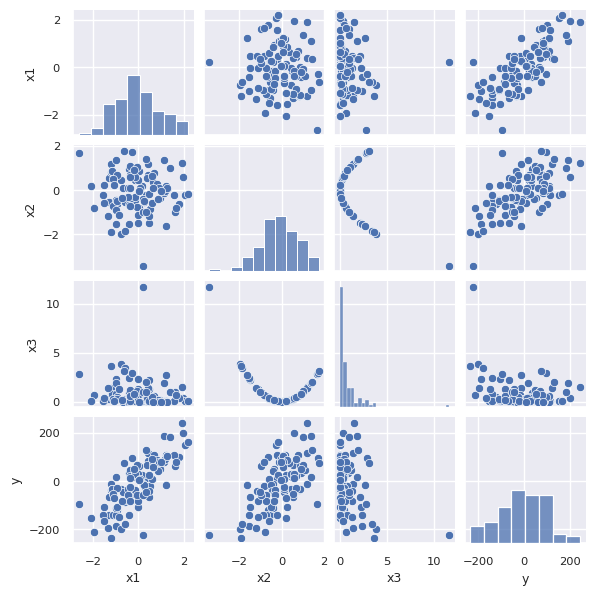

In [67]:
sns.pairplot(df, height=1.5)

<Axes: >

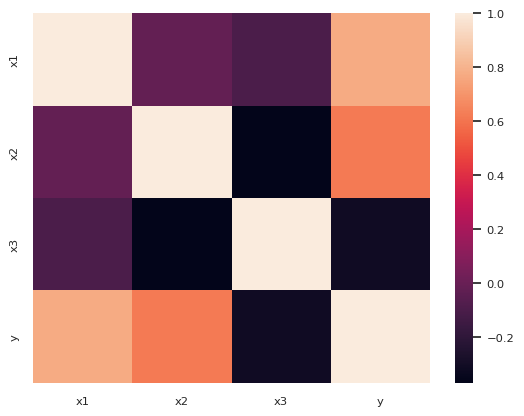

In [68]:
sns.heatmap(df.corr())